# Using pycisTopic on the Timecourse dataset

In [1]:
# SET UP ENVIRONMENT

#supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import os
_stderr = sys.stderr
null = open(os.devnull,'wb')

# set the working directory (now set locally)
import os
work_dir = '/g/scb/zaugg/deuner/SCENIC+/'

# set tmp directory
tmp_dir = '/g/scb/zaugg/deuner/SCENIC+/tmp/'

# set the figures directory
fig_dir = '/g/scb/zaugg/deuner/SCENIC+/figures/'

!pip install -q umap-learn==0.5.1

In [2]:
# Load libraries
import scanpy as sc
import numpy as np
import matplotlib.pyplot as pl
from scipy import io
import pandas as pd

## Creating a cisTopic object and topic modelling

In [3]:
# Start by reading cell metadata from the scRNA-seq
import scanpy as sc
adata = sc.read_h5ad(os.path.join(tmp_dir, 'timecourse.nomicro.subset.adata.h5ad'))
scRNA_bc = adata.obs.barcode
cell_data = adata.obs
cell_data['sample_id'] = 'timecourse'
cell_data['celltype'] = cell_data['celltype_wnn'].astype(str) # set data type of the celltype column to str, otherwise the export_pseudobulk function will complain.
del(adata)

In [4]:
# Load scATAC-seq data
import pickle
fragments_dict = {'timecourse': os.path.join(work_dir, 'inputdata/timecourse_fragments_translated_ordered4.tsv')}
path_to_regions = {'timecourse':os.path.join(tmp_dir, 'scATAC/consensus_peak_calling/consensus_regions.bed')}
metadata_bc = pickle.load(open(os.path.join(tmp_dir, 'scATAC/quality_control/metadata_bc.pkl'), 'rb'))
bc_passing_filters = pickle.load(open(os.path.join(tmp_dir, 'scATAC/quality_control/bc_passing_filters.pkl'), 'rb'))

In [5]:
print(f"{len(list(set(bc_passing_filters['timecourse']) & set(scRNA_bc)))} cell barcodes pass both scATAC-seq and scRNA-seq based filtering")

128 cell barcodes pass both scATAC-seq and scRNA-seq based filtering


In [6]:
# Create cisTopic Object
from pycisTopic.cistopic_class import *
key = 'timecourse'
cistopic_obj = create_cistopic_object_from_fragments(
                            path_to_fragments=fragments_dict[key],
                            path_to_regions=path_to_regions[key],
                            metrics=metadata_bc[key],
                            valid_bc=list(set(bc_passing_filters[key]) & set(scRNA_bc)),
                            n_cpu=1,
                            project=key,
                            split_pattern="_")


2023-05-07 16:14:26,685 cisTopic     INFO     Reading data for timecourse
2023-05-07 16:16:35,284 cisTopic     INFO     metrics provided!
2023-05-07 16:16:46,892 cisTopic     INFO     valid_bc provided, selecting barcodes!
2023-05-07 16:16:49,960 cisTopic     INFO     Counting fragments in regions


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2023-05-07 16:16:50,697 cisTopic     INFO     Creating fragment matrix
2023-05-07 16:16:51,120 cisTopic     INFO     Converting fragment matrix to sparse matrix
2023-05-07 16:16:51,218 cisTopic     INFO     Creating CistopicObject
2023-05-07 16:16:51,462 cisTopic     INFO     Done!


In [9]:
cell_data.index = scRNA_bc   # this line solved metadata addition problem 

In [10]:
cistopic_obj.add_cell_data(cell_data, split_pattern='_')
print(cistopic_obj)

Columns ['nFeature_RNA', 'SCT_nn_res.0.5', 'wsnn_res.5', 'wsnn_res.18', 'SCT_snn_res.0.5', 'nCount_ATAC', 'wsnn_res.12', 'pANN_0.25_0.005_794', 'wsnn_res.16', 'pseudotime_clusters_n14', 'celltype_wnn', 'basic_celltype', 'wsnn_res.0.75', 'wsnn_res.4', 'wsnn_res.20', 'ATAC.weight', 'wsnn_res.8', 'wsnn_res.1', 'percent.ribo', 'orig.ident', 'seurat_clusters', 'bc', 'wsnn_res.14', 'SCT.weight', 'DF.classifications_0.25_0.005_794', 'pseudotime_clusters_n7', 'wsnn_res.2', 'wsnn_res.3', 'wsnn_res.6', 'wsnn_res.0.8', 'nFeature_ATAC', 'pseudotime', 'celltype', 'wsnn_res.0.5', 'percent.mt', 'nFeature_SCT', 'nCount_RNA', 'doubletClass', 'wsnn_res.0.1', 'nCount_SCT', 'wsnn_res.9', 'wsnn_res.0.25', 'wsnn_res.7', 'sampleID', 'sample_id', 'wsnn_res.10', 'barcode'] will be overwritten
CistopicObject from project timecourse with n_cells × n_regions = 128 × 118093


In [11]:
cistopic_obj.cell_data


,Total_nr_frag,Total_nr_frag_in_regions,Unique_nr_frag,cisTopic_nr_frag,FRIP,cisTopic_log_nr_frag,Log_total_nr_frag,cisTopic_log_nr_acc,Dupl_rate,TSS_enrichment,...,celltype,basic_celltype,pseudotime,pseudotime_clusters_n7,pseudotime_clusters_n14,wsnn_res.0.8,celltype_wnn,sampleID,barcode,sample_id
ATGATGACTAATGTGA_timecourse,754958,334165,5337,2928,0.475173,3.466571,5.877923,3.435048,0.992931,13.003266,...,neuron - development-2,neuron,49.537279,5,10,14,neuron - development-2,timecourse,ATGATGACTAATGTGA,timecourse
ACCTCATGAACGGTTG_timecourse,1068310,567645,7916,4830,0.554699,3.683947,6.028697,3.638689,0.992590,10.767352,...,diff,diff,33.233434,4,7,1,diff,timecourse,ACCTCATGAACGGTTG,timecourse
GGCTAGCACCCTCACG_timecourse,1010867,480271,7345,4395,0.459224,3.642959,6.004694,3.593729,0.992734,10.093255,...,diff,neuron,34.178498,4,7,1,diff,timecourse,GGCTAGCACCCTCACG,timecourse
ATGCTTATGCCCGTAG_timecourse,2812326,1312396,20128,11030,0.487629,4.042576,6.449066,3.981366,0.992843,8.875505,...,diff - NPC-like,diff,19.373090,2,4,2,diff - NPC-like,timecourse,ATGCTTATGCCCGTAG,timecourse
ACAGCACGAGCGCTAA_timecourse,1982065,911086,14680,7644,0.485150,3.883321,6.297118,3.829497,0.992594,9.621857,...,diff,diff,30.608254,4,7,1,diff,timecourse,ACAGCACGAGCGCTAA,timecourse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTAAAGCTACTAACC_timecourse,306758,167007,2276,1410,0.499561,3.149219,5.486796,3.129045,0.992580,10.882922,...,neuron - excitatory,neuron,37.653173,4,8,6,neuron - excitatory,timecourse,CGTAAAGCTACTAACC,timecourse
GATATTGGACCCGGAA_timecourse,289259,160136,2164,1403,0.498614,3.147058,5.461287,3.123852,0.992519,10.631213,...,neuron - excitatory,neuron,34.608211,4,7,6,neuron - excitatory,timecourse,GATATTGGACCCGGAA,timecourse
CTGAGTGACAACAAAG_timecourse,562791,299255,4327,2559,0.477467,3.40807,5.750347,3.376029,0.992312,8.910482,...,diff - hiPSC-like,diff,7.033482,1,2,5,diff - hiPSC-like,timecourse,CTGAGTGACAACAAAG,timecourse
AAGCTCCTGGCGGAAC_timecourse,496358,202754,3849,1876,0.463757,3.273233,5.695795,3.261025,0.992246,11.987138,...,mature.neuron - adhesion,neuron,56.844036,6,12,7,mature.neuron - adhesion,timecourse,AAGCTCCTGGCGGAAC,timecourse


In [12]:
cell_data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,pANN_0.25_0.005_794,...,celltype,basic_celltype,pseudotime,pseudotime_clusters_n7,pseudotime_clusters_n14,wsnn_res.0.8,celltype_wnn,sampleID,barcode,sample_id
barcode,,,,,,,,,,,,,,,,,,,,,
GCCTCAATGACAGAAC,timecourse,7372.0,3241,11.516549,2.902876,7372.0,3241,0,1,0.098592,...,diff - NPC-like,diff,24.902457,3,5,8,diff - NPC-like,timecourse,GCCTCAATGACAGAAC,timecourse
ATTGTCTACTAAAGCT,timecourse,5596.0,2285,0.178699,0.321658,6674.0,2283,4,4,0.056338,...,neuron - mature.neuron,neuron,59.514298,6,12,4,neuron - mature.neuron,timecourse,ATTGTCTACTAAAGCT,timecourse
TTTGTACGAGTAACTA,timecourse,6767.0,3109,9.915768,3.058963,6935.0,3108,0,1,0.056338,...,diff - NPC-like,diff,23.183780,3,5,8,diff - NPC-like,timecourse,TTTGTACGAGTAACTA,timecourse
GATTTGAGAAGTAATC,timecourse,3941.0,2071,0.355240,0.761228,6663.0,2089,5,5,0.084507,...,neuron - excitatory,neuron,37.680784,4,8,6,neuron - excitatory,timecourse,GATTTGAGAAGTAATC,timecourse
CCCTTTACTACAAACA,timecourse,2149.0,1407,11.633318,2.326664,6189.0,1968,2,2,0.183099,...,diff,diff,31.633097,4,7,1,diff,timecourse,CCCTTTACTACAAACA,timecourse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAGACAAACTTGCTCA,timecourse,4619.0,2664,2.359818,2.208270,6478.0,2666,0,1,0.253521,...,diff - NPC-like,diff,25.236132,3,6,2,diff - NPC-like,timecourse,AAGACAAACTTGCTCA,timecourse
AGCCTTGTGCATCCCT,timecourse,6192.0,2610,4.731912,0.645995,6780.0,2609,6,5,0.070423,...,neuron - excitatory,neuron,42.729866,5,9,6,neuron - excitatory,timecourse,AGCCTTGTGCATCCCT,timecourse
CTAACTCACAATACCG,timecourse,4049.0,2435,3.754013,1.778217,6620.0,2447,0,1,0.084507,...,diff - NPC-like,diff,25.116435,3,6,2,diff - NPC-like,timecourse,CTAACTCACAATACCG,timecourse


In [13]:
# Save the object
pickle.dump(cistopic_obj,
            open(os.path.join(tmp_dir, 'scATAC/cistopic_obj.pkl'), 'wb'))

In [14]:
# Run topic modelling. The purpose of this is twofold:
# 1. To find sets of co-accessible regions (topics), this will be used downstream as candidate enhancers (together with Differentially Accessible Regions (DARs)).
# 2. To impute dropouts.

import pickle
cistopic_obj = pickle.load(open(os.path.join(tmp_dir, 'scATAC/cistopic_obj.pkl'), 'rb'))
from pycisTopic.cistopic_class import *
models=run_cgs_models(cistopic_obj,
                    n_topics=[2,4,10,16,32,48],
                    n_cpu=1, #5
                    n_iter=500,
                    random_state=555,
                    alpha=50,
                    alpha_by_topic=True,
                    eta=0.1,
                    eta_by_topic=False,
                    save_path=None)#,
                    #_temp_dir = os.path.join(tmp_dir + 'ray_spill'))

2023-05-07 16:17:47,415	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


(run_cgs_model pid=3824902) 2023-05-07 16:18:02,117 cisTopic     INFO     Running model with 2 topics
(run_cgs_model pid=3824902) 2023-05-07 16:18:21,721 cisTopic     INFO     Model with 2 topics done!
(run_cgs_model pid=3824902) 2023-05-07 16:18:21,756 cisTopic     INFO     Running model with 4 topics
(run_cgs_model pid=3824902) 2023-05-07 16:18:50,364 cisTopic     INFO     Model with 4 topics done!
(run_cgs_model pid=3824902) 2023-05-07 16:18:50,399 cisTopic     INFO     Running model with 10 topics
(run_cgs_model pid=3824902) 2023-05-07 16:19:38,954 cisTopic     INFO     Model with 10 topics done!
(run_cgs_model pid=3824902) 2023-05-07 16:19:38,994 cisTopic     INFO     Running model with 16 topics
(run_cgs_model pid=3824902) 2023-05-07 16:20:48,049 cisTopic     INFO     Model with 16 topics done!
(run_cgs_model pid=3824902) 2023-05-07 16:20:48,090 cisTopic     INFO     Running model with 32 topics
(run_cgs_model pid=3824902) 2023-05-07 16:23:22,634 cisTopic     INFO     Model with 

In [15]:
# Save results
if not os.path.exists(os.path.join(tmp_dir, 'scATAC/models')):
    os.makedirs(os.path.join(tmp_dir, 'scATAC/models'))

pickle.dump(models,
            open(os.path.join(tmp_dir, 'scATAC/models/timecourse_models_500_iter_LDA.pkl'), 'wb'))

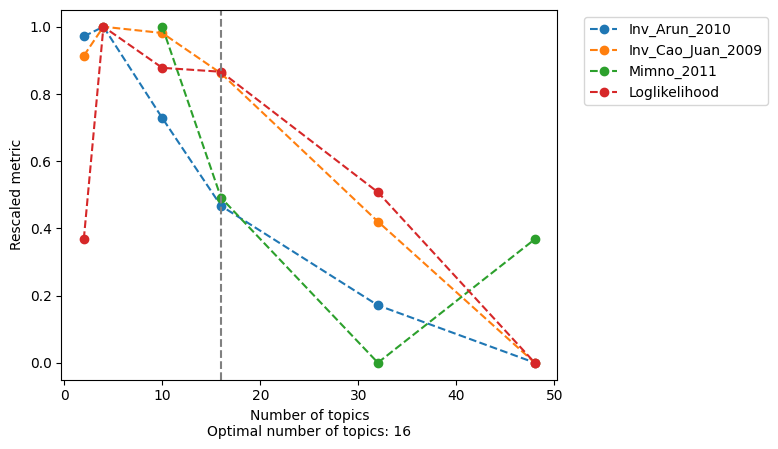

In [16]:
# Analyze models
# We will make use of four quality metrics to select the model with the optimal amount of topics: 1. Arun et al. 2010 2. Cao & Juan et al. 2009 3. Mimno et al. 2011 4. Log likelihood

models = pickle.load(open(os.path.join(tmp_dir, 'scATAC/models/timecourse_models_500_iter_LDA.pkl'), 'rb'))
cistopic_obj = pickle.load(open(os.path.join(tmp_dir, 'scATAC/cistopic_obj.pkl'), 'rb'))
from pycisTopic.lda_models import *
model = evaluate_models(models,
                       select_model=16, #select the models we want to visualize [2,4,10,16,32,48]
                       return_model=True,
                       metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                       plot_metrics=False)

In [17]:
# Choose the ??? model
cistopic_obj.add_LDA_model(model)
pickle.dump(cistopic_obj,
            open(os.path.join(tmp_dir, 'scATAC/cistopic_obj.pkl'), 'wb'))

## Visualization

2023-05-07 16:27:58,368 cisTopic     INFO     Running UMAP


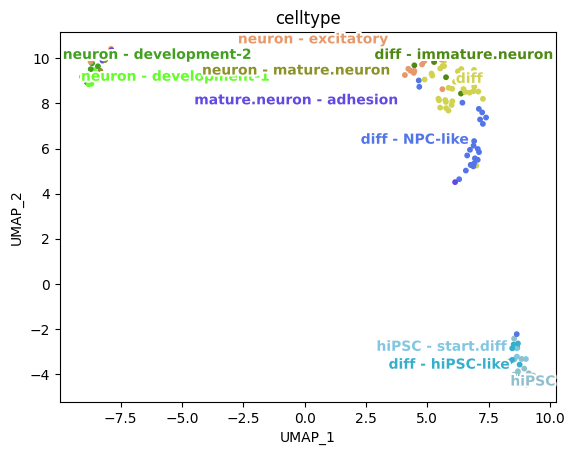

In [18]:
# We can use the cell-topic probabilities to generate dimensionality reductions.
from pycisTopic.clust_vis import *
run_umap(cistopic_obj, target  = 'cell', scale=True)
plot_metadata(cistopic_obj, reduction_name = 'UMAP', variables = ['celltype'])

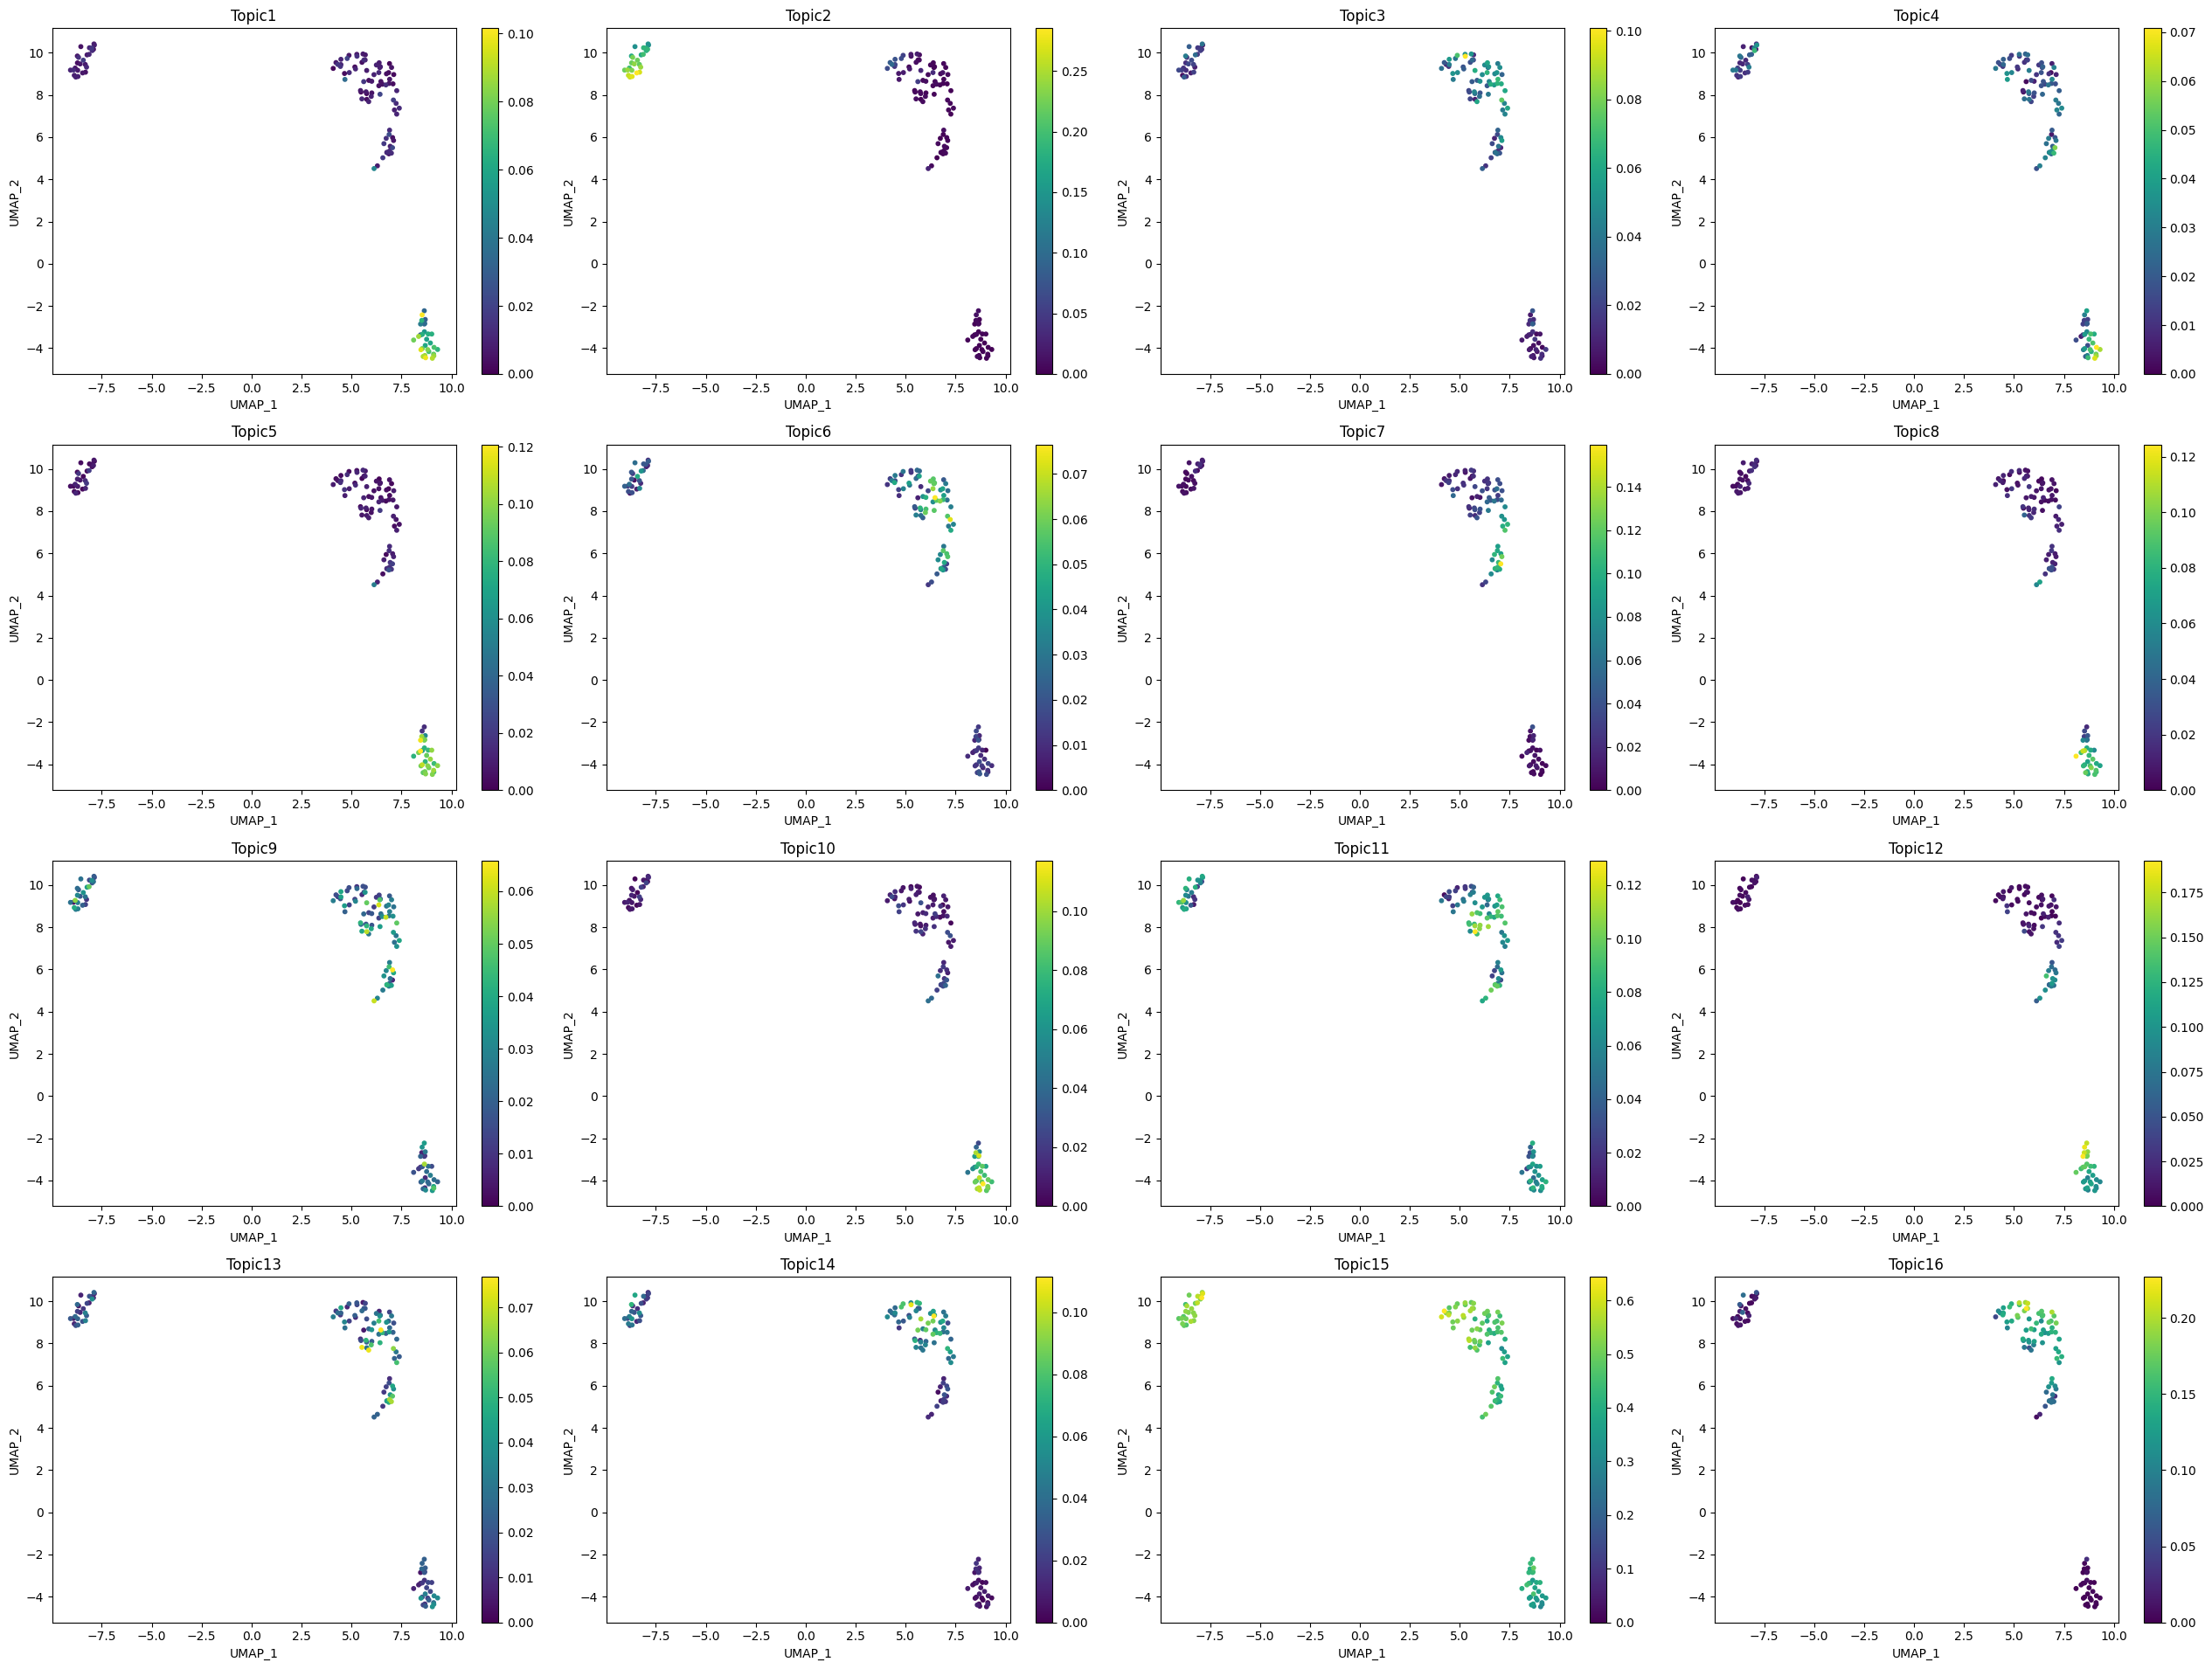

In [19]:
# We can also plot the cell-topic probabilities on the UMAP, to visualize their cell type specifiticy.
plot_topic(cistopic_obj, reduction_name = 'UMAP', num_columns = 4)

## Inferring candidate enhancer regions

In [20]:
# Next we will infer candidate enhancer regions by:
# 1. binarization of region-topic probabilites.
# 2. calculation differentially accessibile regions (DARs) per cell type.
# These regions will be used as input for the next step, pycistarget, in which we will look which motifs are enriched in these regions.

# First we will binarize the topics using the otsu method and by taking the top 3k regions per topic.
from pycisTopic.topic_binarization import *
region_bin_topics_otsu = binarize_topics(cistopic_obj, method='otsu')
region_bin_topics_top3k = binarize_topics(cistopic_obj, method='ntop', ntop = 3000)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [23]:
# Next we will calculate DARs per cell type
from pycisTopic.diff_features import *
imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
variable_regions = find_highly_variable_features(normalized_imputed_acc_obj, plot = False)


2023-05-07 16:30:21,036 cisTopic     INFO     Imputing drop-outs
2023-05-07 16:30:21,366 cisTopic     INFO     Scaling
2023-05-07 16:30:21,390 cisTopic     INFO     Keep non zero rows
2023-05-07 16:30:21,454 cisTopic     INFO     Imputed accessibility sparsity: 0.0
2023-05-07 16:30:21,455 cisTopic     INFO     Create CistopicImputedFeatures object
2023-05-07 16:30:21,455 cisTopic     INFO     Done!
2023-05-07 16:30:21,456 cisTopic     INFO     Normalizing imputed data
2023-05-07 16:30:21,672 cisTopic     INFO     Done!
2023-05-07 16:30:21,673 cisTopic     INFO     Calculating mean
2023-05-07 16:30:21,687 cisTopic     INFO     Calculating variance
2023-05-07 16:30:23,867 cisTopic     INFO     Done!


<Figure size 640x480 with 0 Axes>

In [25]:
markers_dict = find_diff_features(cistopic_obj, imputed_acc_obj, variable='celltype', var_features=variable_regions, split_pattern = '_')

2023-05-07 16:30:59,034 cisTopic     INFO     Formatting data for diff
2023-05-07 16:30:59,104 cisTopic     INFO     Computing p-value for diff
2023-05-07 16:31:32,268 cisTopic     INFO     Computing log2FC for diff
2023-05-07 16:31:33,981 cisTopic     INFO     diff done!
2023-05-07 16:31:33,988 cisTopic     INFO     Formatting data for diff - NPC-like
2023-05-07 16:31:34,035 cisTopic     INFO     Computing p-value for diff - NPC-like
2023-05-07 16:32:07,442 cisTopic     INFO     Computing log2FC for diff - NPC-like
2023-05-07 16:32:09,147 cisTopic     INFO     diff - NPC-like done!
2023-05-07 16:32:09,154 cisTopic     INFO     Formatting data for diff - hiPSC-like
2023-05-07 16:32:09,199 cisTopic     INFO     Computing p-value for diff - hiPSC-like
2023-05-07 16:32:42,177 cisTopic     INFO     Computing log2FC for diff - hiPSC-like
2023-05-07 16:32:43,891 cisTopic     INFO     diff - hiPSC-like done!
2023-05-07 16:32:43,899 cisTopic     INFO     Formatting data for diff - immature.neu

In [26]:
markers_dict

{'diff':                             Log2FC Adjusted_pval Contrast
 chr2:1593521-1594021      1.432294           0.0     diff
 chr9:84170677-84171177    1.421342           0.0     diff
 chr10:86673925-86674425   1.419963           0.0     diff
 chr9:138010110-138010610  1.413758           0.0     diff
 chr2:6957850-6958350      1.413479           0.0     diff
 ...                            ...           ...      ...
 chr8:37736872-37737372    0.585561      0.000022     diff
 chr15:38252721-38253221   0.585561      0.000022     diff
 chr19:29259796-29260296   0.585561      0.000022     diff
 chr5:140691408-140691908  0.585354           0.0     diff
 chr17:47072791-47073291   0.585329      0.000001     diff
 
 [9524 rows x 3 columns],
 'diff - NPC-like':                            Log2FC Adjusted_pval         Contrast
 chr1:43184834-43185334   2.090918           0.0  diff - NPC-like
 chr4:7697298-7697798     2.090918           0.0  diff - NPC-like
 chr21:39598333-39598833  2.090918     

In [27]:
# Save results
if not os.path.exists(os.path.join(tmp_dir, 'scATAC/candidate_enhancers')):
    os.makedirs(os.path.join(tmp_dir, 'scATAC/candidate_enhancers'))
import pickle
pickle.dump(region_bin_topics_otsu, open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/region_bin_topics_otsu.pkl'), 'wb'))
pickle.dump(region_bin_topics_top3k, open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/region_bin_topics_top3k.pkl'), 'wb'))
pickle.dump(markers_dict, open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/markers_dict.pkl'), 'wb'))

We now completed all the mininal scATAC-seq preprocessing steps.

In particular we:

    1. generated a set of consensus peaks

    2. performed quality control steps, only keeping cell barcods which passed QC metrics in both the scRNA-seq and scATAC-seq assay

    3. performed topic modeling

    4. inferred candidate enhancer regions by binarizing the region-topic probabilities and DARs per cell type

## Motif enrichment analysis using pycistarget

In [3]:
# Load candidate enhancer regions identified in previous step.
import pickle
region_bin_topics_otsu = pickle.load(open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/region_bin_topics_otsu.pkl'), 'rb'))
region_bin_topics_top3k = pickle.load(open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/region_bin_topics_top3k.pkl'), 'rb'))
markers_dict = pickle.load(open(os.path.join(tmp_dir, 'scATAC/candidate_enhancers/markers_dict.pkl'), 'rb'))

In [4]:
# Convert to dictionary of pyranges objects
import pyranges as pr
from pycistarget.utils import region_names_to_coordinates
region_sets = {}
region_sets['topics_otsu'] = {}
region_sets['topics_top_3'] = {}
region_sets['DARs'] = {}
for topic in region_bin_topics_otsu.keys():
    regions = region_bin_topics_otsu[topic].index[region_bin_topics_otsu[topic].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets['topics_otsu'][topic] = pr.PyRanges(region_names_to_coordinates(regions))
for topic in region_bin_topics_top3k.keys():
    regions = region_bin_topics_top3k[topic].index[region_bin_topics_top3k[topic].index.str.startswith('chr')] #only keep regions on known chromosomes
    region_sets['topics_top_3'][topic] = pr.PyRanges(region_names_to_coordinates(regions))


In [5]:
for DAR in markers_dict.keys():
    regions = markers_dict[DAR].index[markers_dict[DAR].index.str.startswith('chr')] #only keep regions on known chromosomes
    if len(regions) > 0:
        region_sets['DARs'][DAR] = pr.PyRanges(region_names_to_coordinates(regions))
        # https://github.com/aertslab/scenicplus/issues/87
#for DAR in markers_dict.keys():
#    #print(DAR)
#    regions = markers_dict[DAR].index[markers_dict[DAR].index.str.startswith('chr')] #only keep regions on known chromosomes
#    print(regions)
#    region_sets['DARs'][DAR] = pr.PyRanges(region_names_to_coordinates(regions))

In [6]:
regions
region_bin_topics_otsu[topic].index[region_bin_topics_otsu[topic].index.str.startswith('chr')]
markers_dict[DAR]

,Log2FC,Adjusted_pval,Contrast
chr1:24438439-24438939,2.28677,0.003301,neuron - mature.neuron
chr2:129277413-129277913,2.269757,0.003301,neuron - mature.neuron
chr6:5827488-5827988,2.269757,0.003301,neuron - mature.neuron
chr4:7529563-7530063,2.259014,0.003301,neuron - mature.neuron
chr11:44207193-44207693,2.259014,0.003301,neuron - mature.neuron
...,...,...,...
chr8:54134945-54135445,0.586675,0.003301,neuron - mature.neuron
chr6:79234516-79235016,0.585778,0.003301,neuron - mature.neuron
chr22:18001549-18002049,0.585778,0.003301,neuron - mature.neuron
chr19:55503639-55504139,0.585224,0.003301,neuron - mature.neuron


In [7]:
for key in region_sets.keys():
    print(f'{key}: {region_sets[key].keys()}')

topics_otsu: dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16'])
topics_top_3: dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16'])
DARs: dict_keys(['diff', 'diff - NPC-like', 'diff - hiPSC-like', 'diff - immature.neuron', 'hiPSC', 'neuron - development-1', 'neuron - development-2', 'neuron - excitatory', 'neuron - mature.neuron'])


In [8]:
# Define rankings, score and motif annotation database
db_fpath = "/g/scb2/zaugg/deuner/SCENIC+/cistarget_databases/"
motif_annot_fpath = "/g/scb2/zaugg/deuner/SCENIC+/cistarget_databases/"

In [9]:
rankings_db = os.path.join(db_fpath, 'hg38_screen_v10_clust.regions_vs_motifs.rankings.feather')
scores_db =  os.path.join(db_fpath, 'hg38_screen_v10_clust.regions_vs_motifs.scores.feather')
motif_annotation = os.path.join(motif_annot_fpath, 'motifs-v10nr_clust-nr.hgnc-m0.001-o0.0.tbl')

In [10]:
# Run pycistarget using the run_pycistarget wrapper function
if not os.path.exists(os.path.join(tmp_dir, 'motifs')):
    os.makedirs(os.path.join(tmp_dir, 'motifs'))

In [11]:
from scenicplus.wrappers.run_pycistarget import run_pycistarget
run_pycistarget(
    region_sets = region_sets,
    species = 'homo_sapiens',
    save_path = os.path.join(tmp_dir, 'motifs'),
    ctx_db_path = rankings_db,
    dem_db_path = scores_db,
    path_to_motif_annotations = motif_annotation,
    run_without_promoters = True,
    n_cpu = 1,
    _temp_dir = os.path.join(tmp_dir, 'ray_spill'),
    annotation_version = 'v10nr_clust',
    )

2023-05-08 09:40:26,583 pycisTarget_wrapper INFO     /g/scb/zaugg/deuner/SCENIC+/tmp/motifs folder already exists.
2023-05-08 09:40:27,190 pycisTarget_wrapper INFO     Loading cisTarget database for topics_otsu
2023-05-08 09:40:27,191 cisTarget    INFO     Reading cisTarget database
2023-05-08 09:47:27,738 pycisTarget_wrapper INFO     Running cisTarget for topics_otsu
2023-05-08 09:47:27,741 cisTarget    INFO     Running cisTarget for Topic1 which has 4768 regions
2023-05-08 09:47:49,535 cisTarget    INFO     Annotating motifs for Topic1
2023-05-08 09:47:52,884 cisTarget    INFO     Getting cistromes for Topic1
2023-05-08 09:47:53,383 cisTarget    INFO     Running cisTarget for Topic2 which has 2970 regions
2023-05-08 09:48:09,604 cisTarget    INFO     Annotating motifs for Topic2
2023-05-08 09:48:12,133 cisTarget    INFO     Getting cistromes for Topic2
2023-05-08 09:48:12,634 cisTarget    INFO     Running cisTarget for Topic3 which has 4618 regions
2023-05-08 09:48:29,038 cisTarget  

In [12]:
# Explore some of the results
import dill
menr = dill.load(open(os.path.join(tmp_dir, 'motifs/menr.pkl'), 'rb'))

In [15]:
menr['DEM_topics_otsu_All'].DEM_results('Topic2')

,Logo,Contrast,Direct_annot,Orthology_annot,Log2FC,Adjusted_pval,Mean_fg,Mean_bg,Motif_hit_thr,Motif_hits
swissregulon__hs__ONECUT1,,Topic2,ONECUT1,NaN,2.410062,0.000021,0.614597,0.115635,3.0,303.0
metacluster_78.7,,Topic2,PAX3,NaN,2.279886,0.007106,0.221772,0.045666,3.0,79.0
metacluster_78.5,,Topic2,PAX7,NaN,2.156036,0.011952,0.184818,0.041468,3.0,59.0
metacluster_78.18,,Topic2,PAX7,NaN,1.97969,0.047329,0.185224,0.046963,3.0,65.0
metacluster_78.17,,Topic2,PAX3,NaN,1.826555,0.001654,0.259361,0.073124,3.0,93.0
metacluster_78.13,,Topic2,PAX3,NaN,1.791121,0.000892,0.362221,0.104663,3.0,97.0
taipale_cyt_meth__CUX1_NYATTGATYN_eDBD_meth,,Topic2,CUX1,NaN,1.756476,0.000004,0.694336,0.205503,3.0,307.0
metacluster_78.20,,Topic2,NaN,PAX7,1.573976,0.000084,0.412862,0.138673,3.0,142.0
metacluster_165.5,,Topic2,"ONECUT3, CUX2, CUX1, ONECUT2, ONECUT1","ONECUT3, ONECUT2, ONECUT1",1.424225,0.000004,0.814937,0.303661,3.0,311.0
tfdimers__MD00133,,Topic2,"YY1, ZNF333",NaN,1.316525,0.047287,0.286777,0.115141,3.0,95.0


We now have completed all the steps necessary for starting the SCENIC+ analysis ?.

In particalular, we have

preprocessed the scRNA-seq side of the data, selecting high quality cells and annotation these cells.

preprocessed the scATAC-seq side of the data, selecting high quality cells, performing topic modeling and identifying candidate enhacer regions.

looked for enriched motifs in candidate enhancer regions.

In the next section we will combine all these analysis and run SCENIC+